<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing Data Set**
http://archive.ics.uci.edu/ml/datasets/bank+marketing

In [0]:
import numpy as np
import pandas as pd
import os
from google.colab import files

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [0]:
os.getcwd()

'/content'

In [0]:
bank_df = pd.read_csv("bank-additional-full.csv", sep=";")
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [0]:
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Dealing with Missing values:


### Dealing with Duplicate values:


In [0]:
bank_dup = bank_df[bank_df.duplicated(keep="last")]
bank_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [0]:
bank_dup.shape

(12, 21)

In [0]:
bank_df = bank_df.drop_duplicates()
bank_df.shape

(41176, 21)

### Numeriacal Attributes EDA

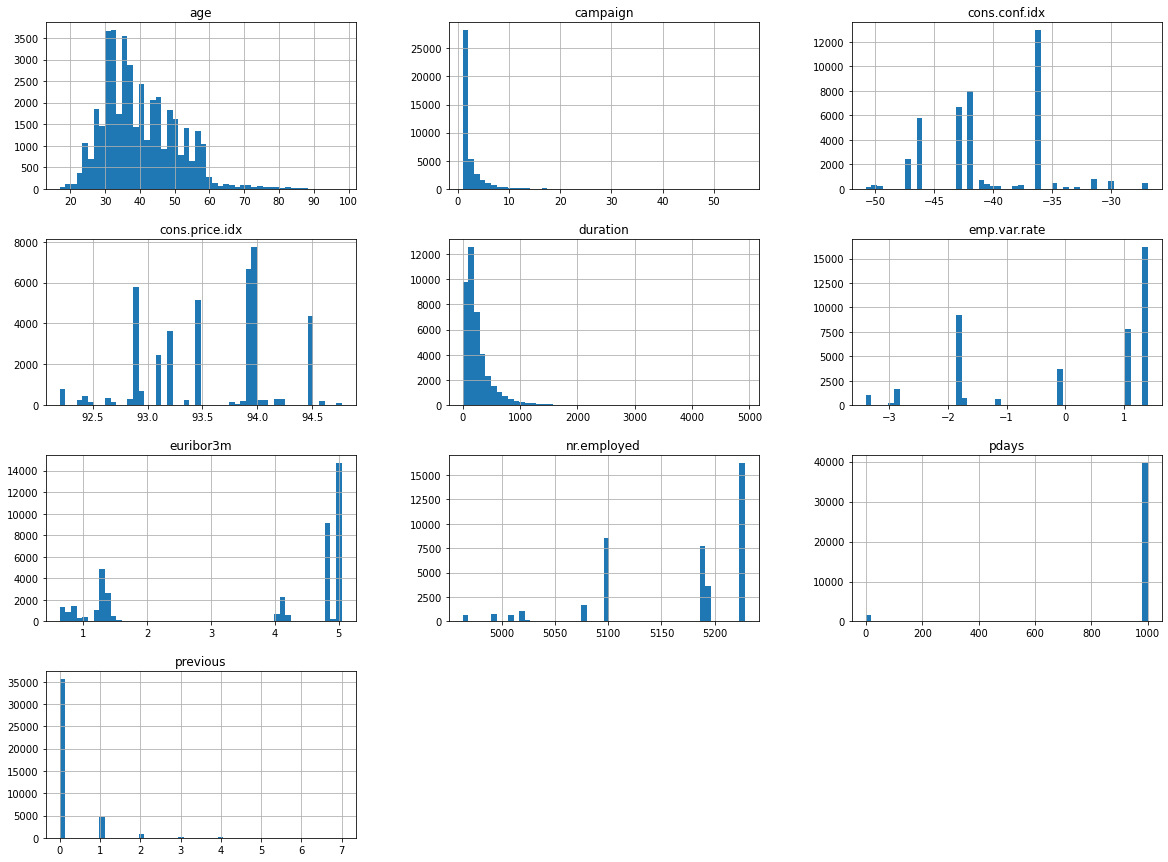

In [0]:
bank_df.hist(bins=50, figsize=(20,15));

* age

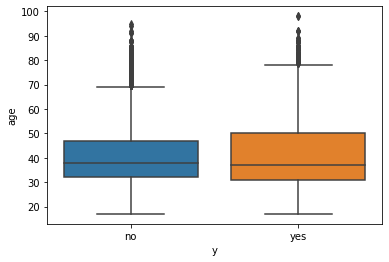

In [0]:
sns.boxplot(x='y', y='age', data=bank_df);

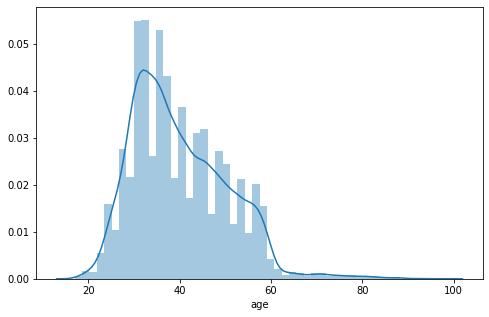

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['age']);

* Duration  
This attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
we also know that we will not be able to include this feature in our final models, as obviously we want to create a realistic predictive model that can be used by the business.

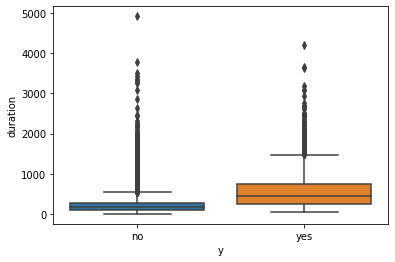

In [0]:
sns.boxplot(x='y', y='duration', data=bank_df);

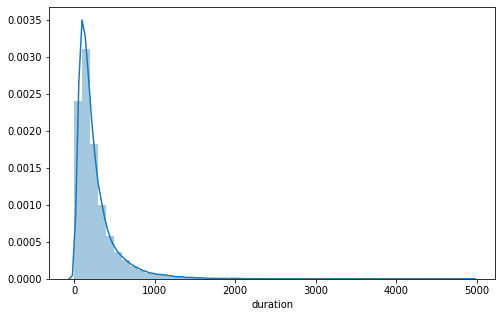

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['duration']);

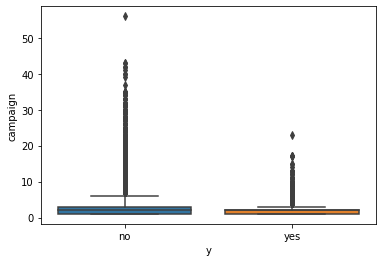

In [0]:
sns.boxplot(x='y', y='campaign', data=bank_df);

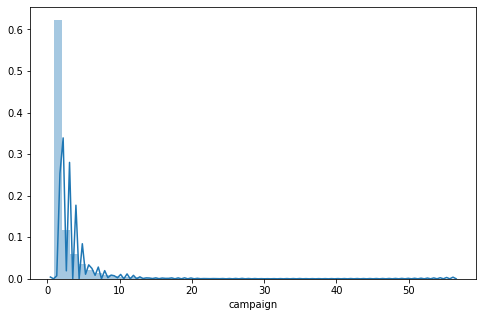

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['campaign']);

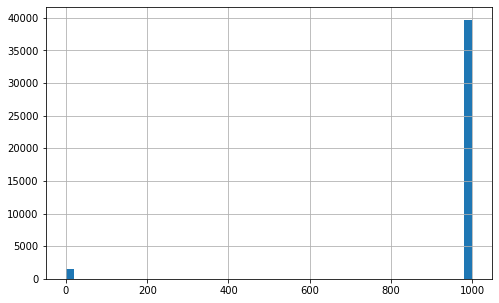

In [0]:
bank_df['pdays'].hist(bins=50, figsize=(8,5));

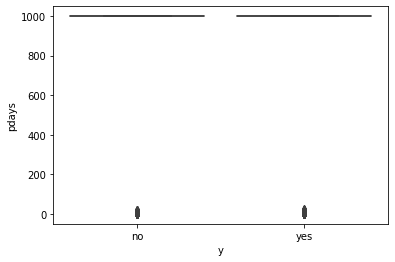

In [0]:
sns.boxplot(x='y', y='pdays', data=bank_df);

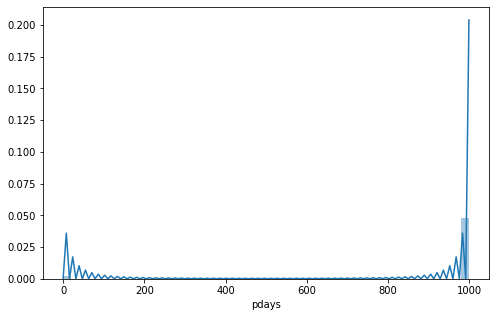

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['pdays']);

In [0]:
bank_df['pdays'] = bank_df['pdays'].apply(lambda x: 0 if x ==999 else x) # to remove 999

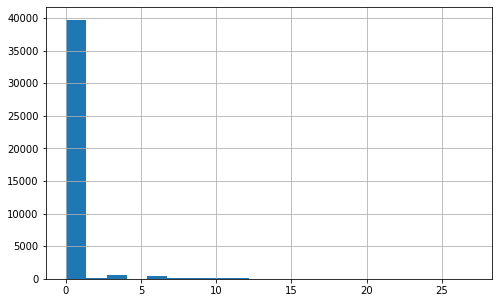

In [0]:
bank_df['pdays'].hist(bins=20, figsize=(8,5));

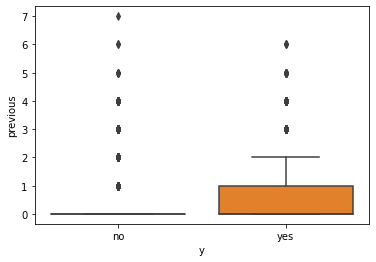

In [0]:
sns.boxplot(x='y', y='previous', data=bank_df);

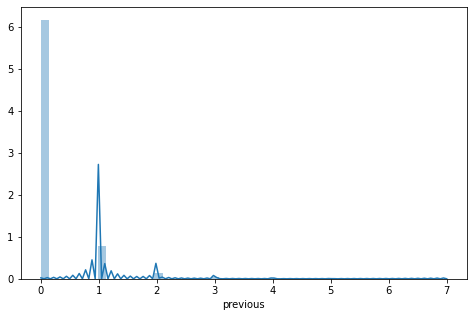

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['previous']);

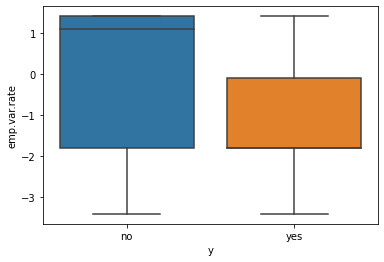

In [0]:
sns.boxplot(x='y', y='emp.var.rate', data=bank_df);

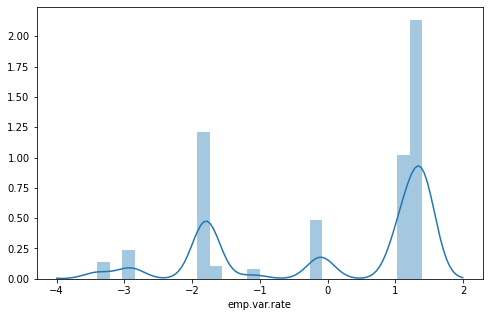

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['emp.var.rate']);

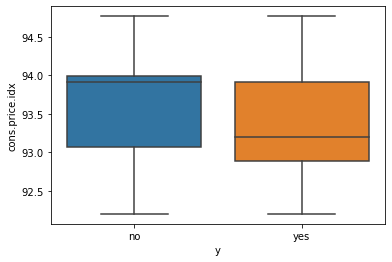

In [0]:
sns.boxplot(x='y', y='cons.price.idx', data=bank_df);

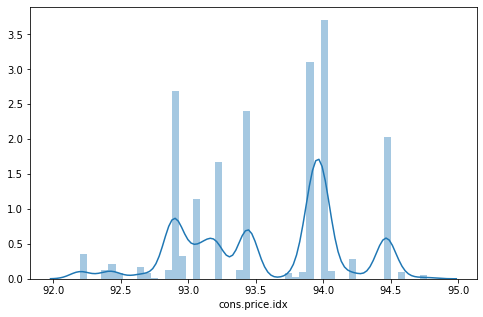

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['cons.price.idx']);

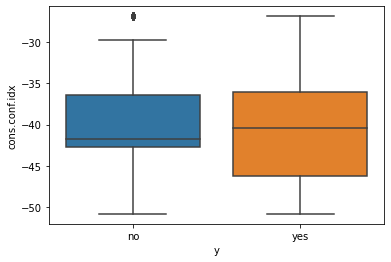

In [0]:
sns.boxplot(x='y', y='cons.conf.idx', data=bank_df);

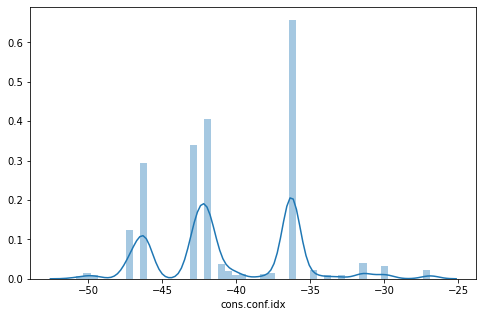

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['cons.conf.idx']);

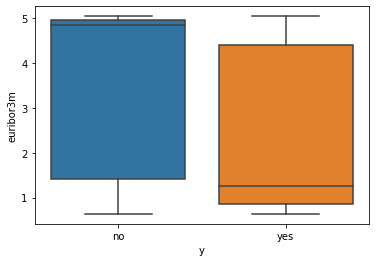

In [0]:
sns.boxplot(x='y', y='euribor3m', data=bank_df);

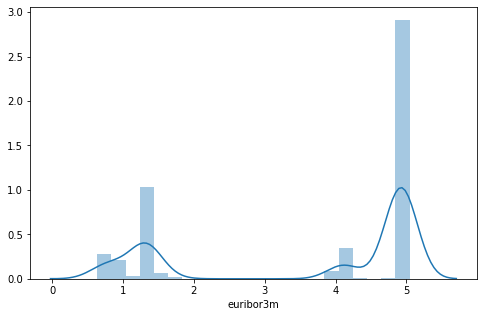

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['euribor3m']);

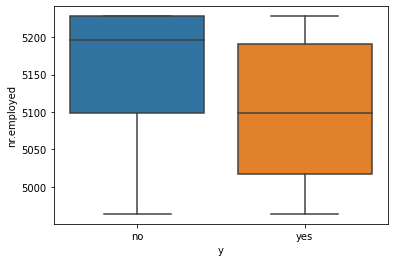

In [0]:
sns.boxplot(x='y', y='nr.employed', data=bank_df);

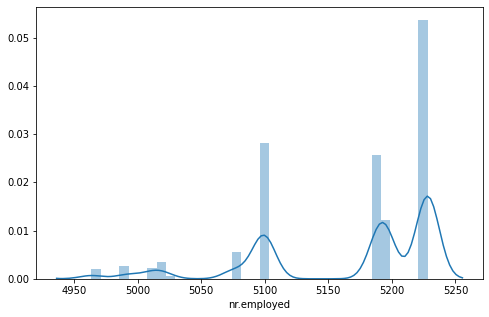

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df['nr.employed']);

In [0]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.221229,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,1.348874,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Categorical Attributes EDA

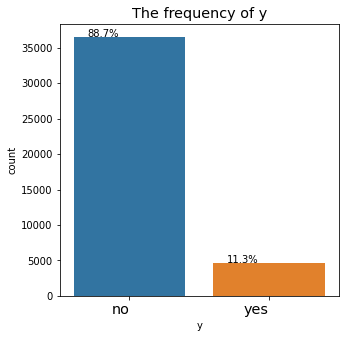

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
total = len(bank_df['y'])*1.
ax = sns.countplot(x="y", data=bank_df, 
                   order=bank_df['y'].value_counts().index) 
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right',
                   fontsize='x-large')
ax.set_title('The frequency of y',fontsize='x-large')
ax.set_xlabel('y');
#print("The ratio of Yes to No:" len)

In [0]:
bank_df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

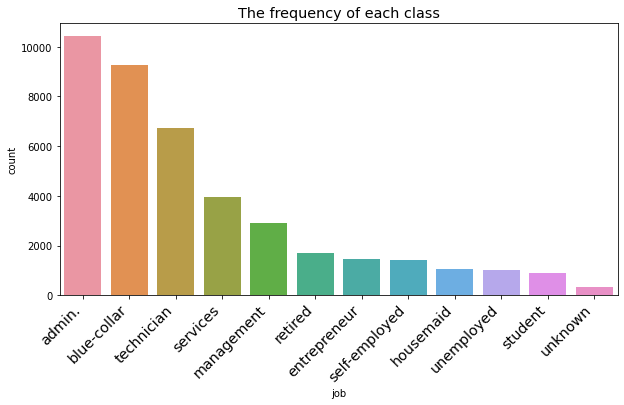

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x="job", data=bank_df, 
                   order=bank_df['job'].value_counts().index) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',
                   fontsize='x-large')
ax.set_title('The frequency of each class',fontsize='x-large')
ax.set_xlabel('job');

In [0]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(12,5))
  Y = dataset[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

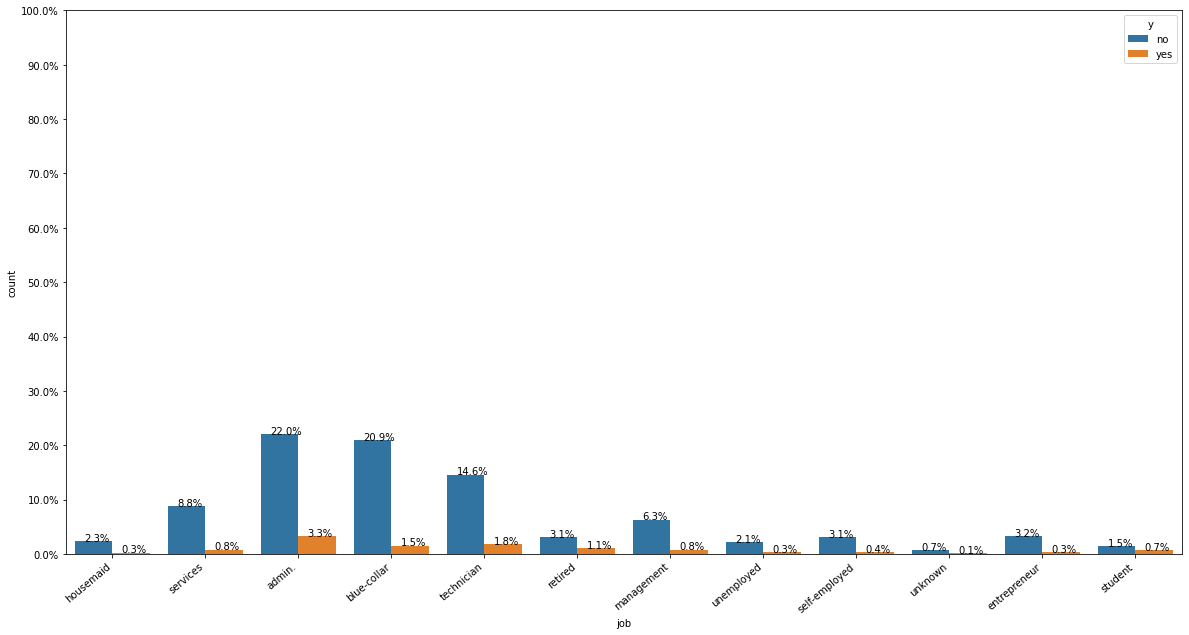

In [0]:
countplot_withY('job', bank_df)

In [0]:
bank_df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

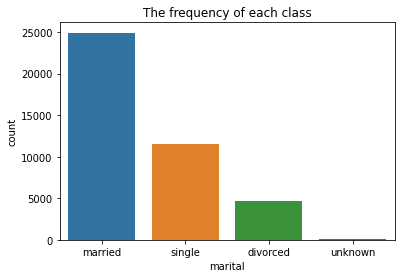

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="marital", data=bank_df) 
ax.set_title('The frequency of each class')
ax.set_xlabel('marital');

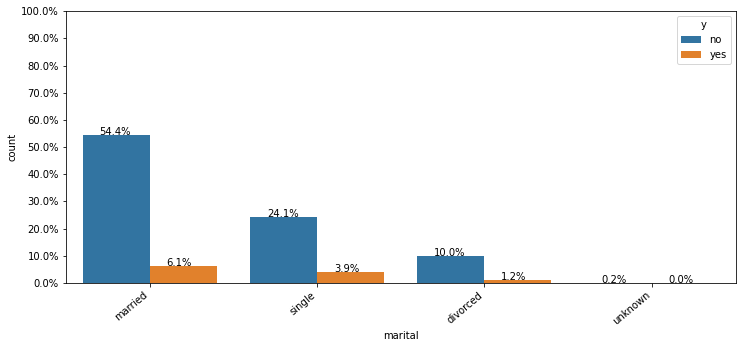

In [0]:
countplot_withY('marital', bank_df)

In [0]:
bank_df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

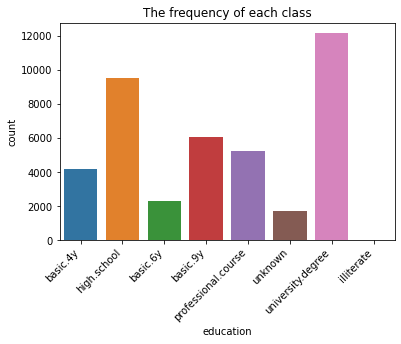

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="education", data=bank_df) 
ax.set_title('The frequency of each class')
ax.set_xlabel('education');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

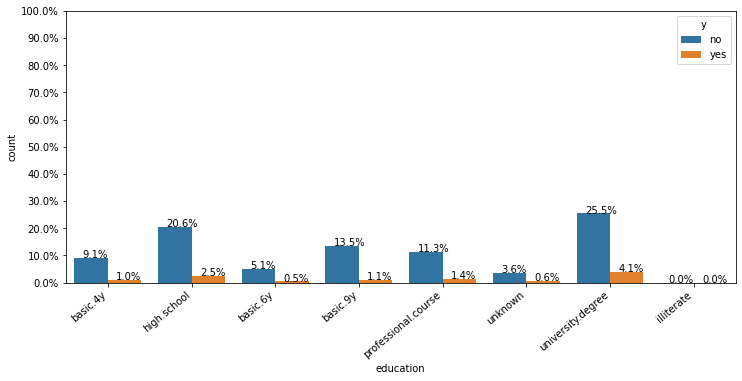

In [0]:
countplot_withY('education', bank_df)

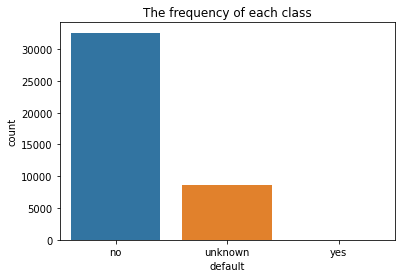

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="default", data=bank_df) 
ax.set_title('The frequency of each class')
ax.set_xlabel('default');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [0]:
bank_df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

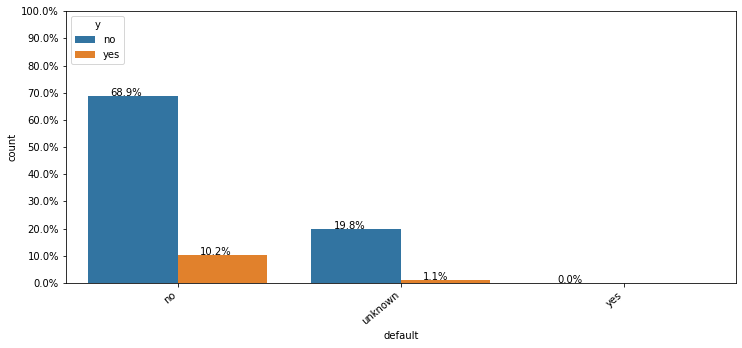

In [0]:
countplot_withY('default', bank_df)

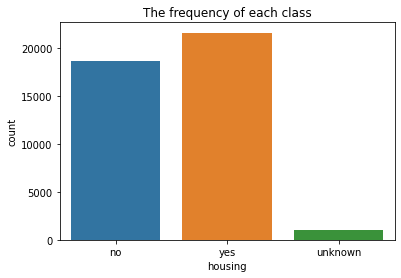

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="housing", data=bank_df) 
ax.set_title('The frequency of each class')
ax.set_xlabel('housing');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

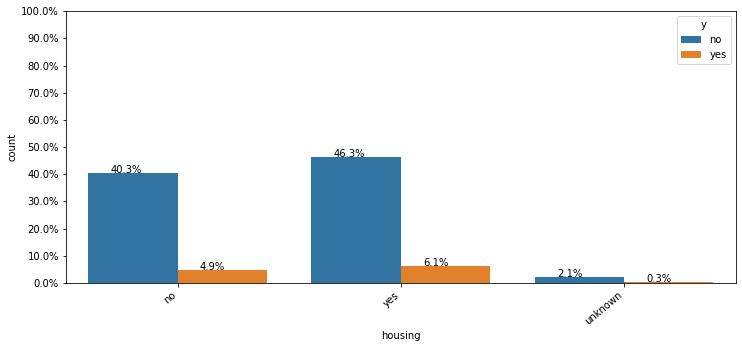

In [0]:
countplot_withY('housing', bank_df)

In [0]:
bank_df["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [0]:
bank_df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

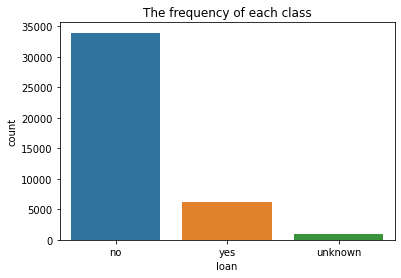

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="loan", data=bank_df) 
ax.set_title('The frequency of each class')
ax.set_xlabel('loan');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

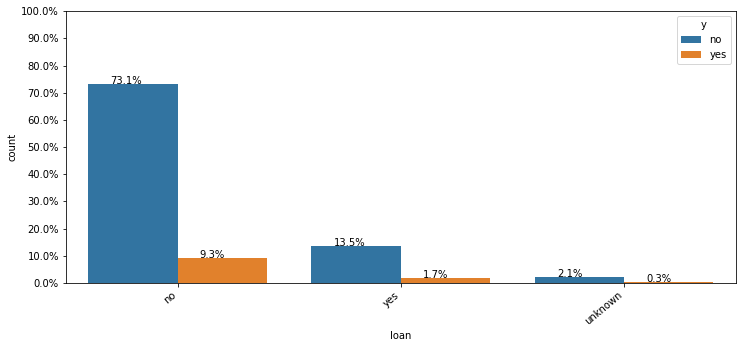

In [0]:
countplot_withY('loan', bank_df)

In [0]:
bank_df["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

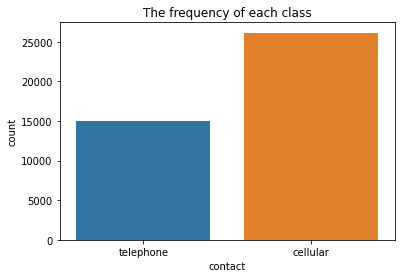

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="contact", data=bank_df) 
ax.set_title('The frequency of each class')
ax.set_xlabel('contact');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

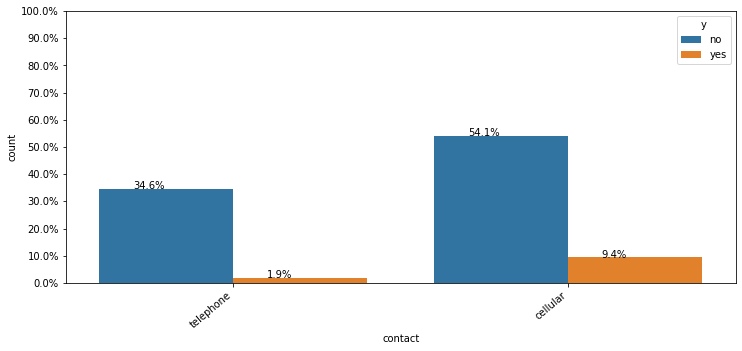

In [0]:
countplot_withY('contact', bank_df)

In [0]:
bank_df["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

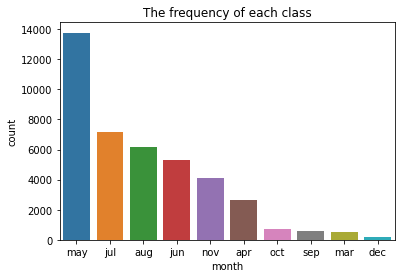

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="month", data=bank_df,order=bank_df['month'].value_counts().index) 
ax.set_title('The frequency of each class')
ax.set_xlabel('month');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

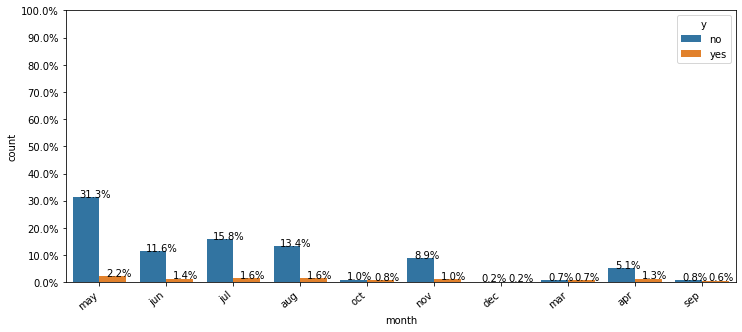

In [0]:
countplot_withY('month', bank_df)

In [0]:
bank_df["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

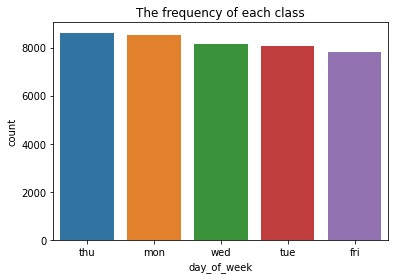

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day_of_week", data=bank_df,order=bank_df['day_of_week'].value_counts().index) 
ax.set_title('The frequency of each class')
ax.set_xlabel('day_of_week');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

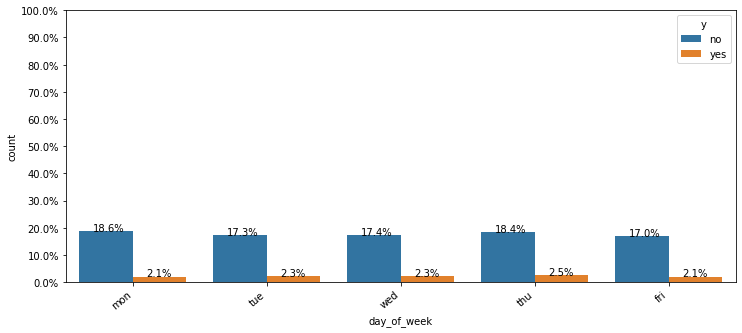

In [0]:
countplot_withY('day_of_week', bank_df)

In [0]:
bank_df["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

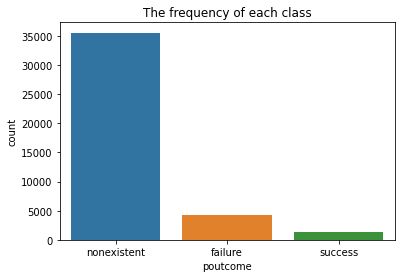

In [0]:
fig, ax = plt.subplots()
ax = sns.countplot(x="poutcome", data=bank_df,order=bank_df['poutcome'].value_counts().index) 
ax.set_title('The frequency of each class')
ax.set_xlabel('poutcome');
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

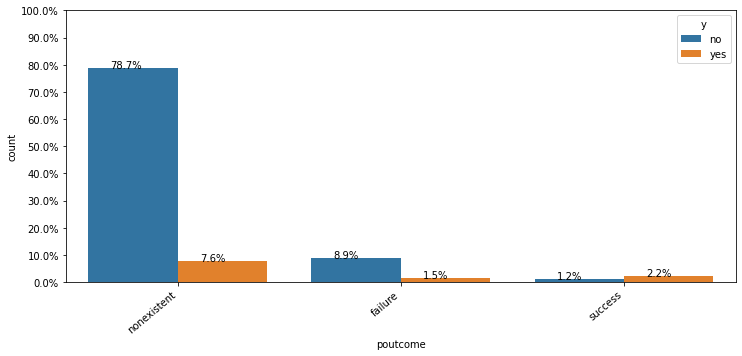

In [0]:
countplot_withY('poutcome', bank_df)

In [0]:
bank_df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [0]:
# def cat_eda(df):
#   for name in df.columns:
#     if df[name].dtype is np.dtype('O'):
#       print("---")
#       print(name)
#       print(df[name].value_counts())

# cat_eda(bank_df)

### Looking for Correlations

In [0]:
corr_matrix = bank_df.corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,0.018132,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,0.047853,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,-0.041984,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,0.018132,0.047853,-0.041984,1.000000,0.485182,-0.218942,-0.041787,0.064192,-0.251822,-0.323122
previous,0.024365,0.020640,-0.079141,0.485182,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,-0.218942,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,-0.041787,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,0.064192,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,-0.251822,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,-0.323122,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Text(0.5, 1.05, 'Correlation Matrix of Features')

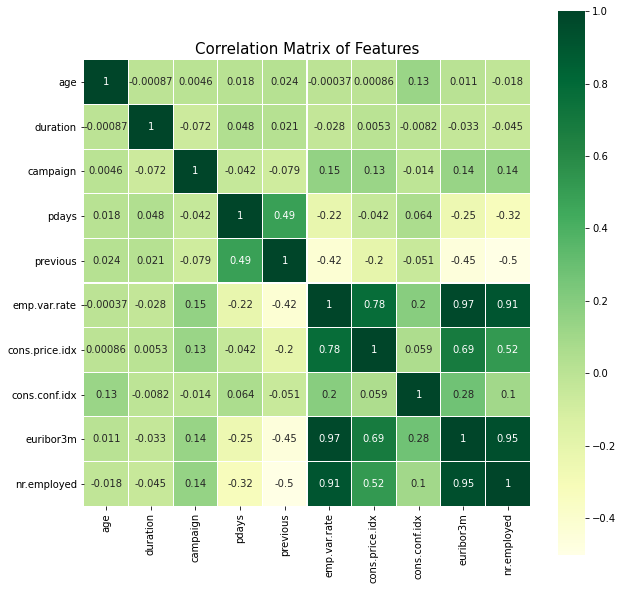

In [0]:
%matplotlib inline
corr_matrix = bank_df.corr()
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr_matrix, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Correlation Matrix of Features", y=1.05, size=15)

In [0]:
from pandas.plotting import scatter_matrix

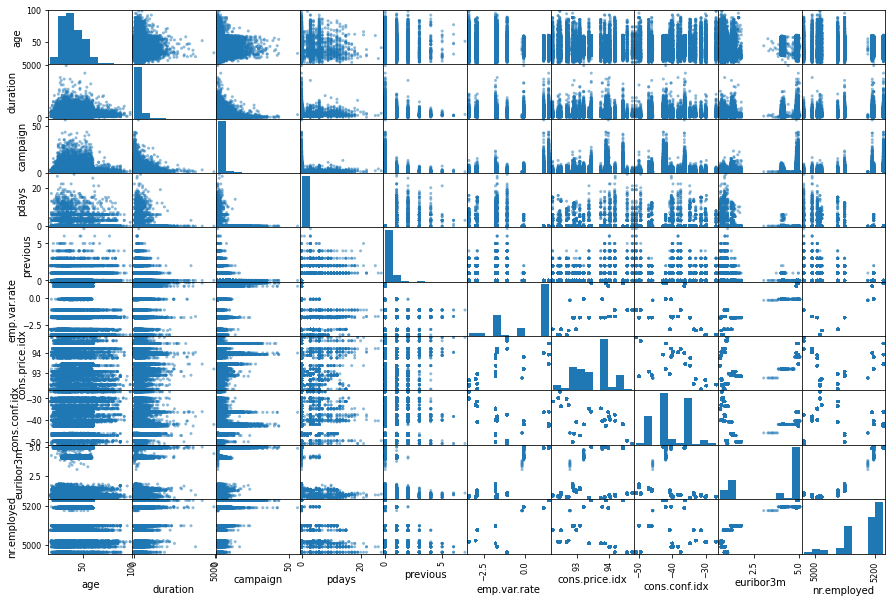

In [0]:
attributes = [attr for attr in bank_df.columns if bank_df[attr].dtype is not np.dtype('O')]
scatter_matrix(bank_df[attributes], figsize=(15, 10));

## Prepare the Data for Machine Learning Algorithms

### Transformation Pipelines

In [0]:
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer

In [0]:
bank_X = bank_df.drop("y", axis=1)
bank_y = bank_df["y"].copy()

In [0]:
num_attr = [attr for attr in bank_X.columns if bank_X[attr].dtype is not np.dtype('O')]
cat_attr = [attr for attr in bank_X.columns if bank_X[attr].dtype is np.dtype('O')]
print("num_attr:", num_attr)
print("cat_attr:", cat_attr)

num_attr: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat_attr: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [0]:
# num_pipeline  = Pipeline([
#                           ('std_scaler', StandardScaler()),
# ])

In [0]:
# full_pipeline = ColumnTransformer([
#                                    ("num", num_pipeline, num_attr),
#                                    ("cat", OneHotEncoder(), cat_attr),
# ])

In [0]:
# bank_prepared = full_pipeline.fit_transform(bank_X)
# bank_prepared = pd.DataFrame(bank_prepared)
# bank_prepared

### Categorical Attributes - One-hot encoding

In [0]:
bank_cat_1hot = pd.get_dummies(bank_df[cat_attr])
#result_df = pd.concat([bank_cat_1hot, bank_X], axis=1)
#result_df.head()
bank_cat_1hot.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [0]:
bank_cat_1hot.columns.values # Performed one-hot encoding so that I can use it in EDA

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pout

In [0]:
bank_y = bank_y.apply(lambda x: 1 if x =='yes' else 0)
bank_y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

### Numerical Attributes - Standardize

In [0]:
scaler = StandardScaler()
scales_num = scaler.fit_transform(bank_X[num_attr])
bank_num = pd.DataFrame(scales_num, index=bank_X[num_attr].index, columns=bank_X[num_attr].columns)
bank_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533143,0.010352,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
1,1.629107,-0.421577,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
2,-0.290177,-0.124626,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
3,-0.002284,-0.413864,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695
4,1.533143,0.187751,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695


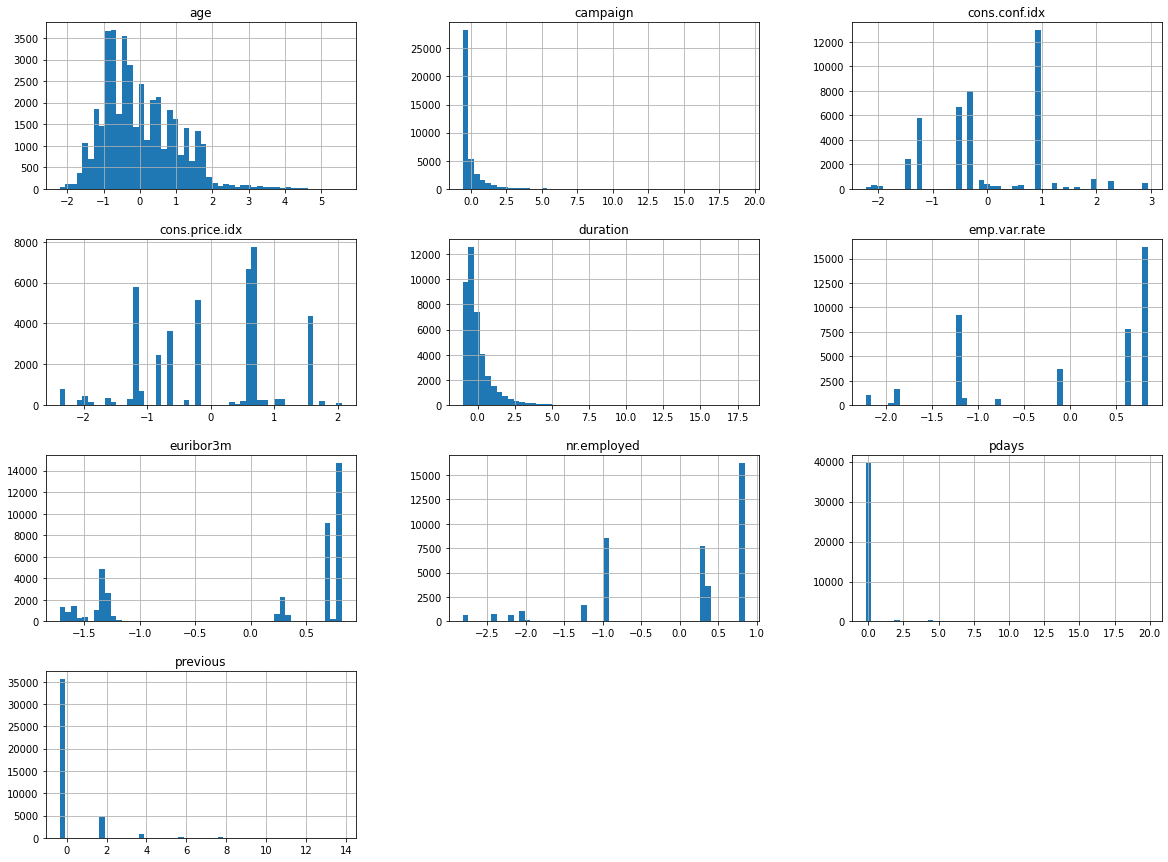

In [0]:
bank_num.hist(bins=50, figsize=(20,15));

In [0]:
bank_prepared = pd.concat([bank_num, bank_cat_1hot, bank_y], axis=1)
bank_prepared.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1.533143,0.010352,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,1.629107,-0.421577,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,-0.290177,-0.124626,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,-0.002284,-0.413864,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,1.533143,0.187751,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


### Comparing Qualitative vs. Quantitative Analysis

* Number of employees vs. Output

In [0]:
grouped = bank_prepared.groupby("y")
nr_employed = grouped["nr.employed"].describe()
nr_employed = nr_employed.unstack(level=-1)
nr_employed

       y
count  0    36537.000000
       1     4639.000000
mean   0        0.126377
       1       -0.995354
std    0        0.893700
       1        1.212194
min    0       -2.815689
       1       -2.815689
25%    0       -0.940269
       1       -2.069673
50%    0        0.398131
       1       -0.940269
75%    0        0.845186
       1        0.331695
max    0        0.845186
       1        0.845186
dtype: float64

Conclusion:  
Number of employess (mean) is less for output-yes which suggests that higher number of employees have negative impact on output

* Pdays vs. output

In [0]:
grouped = bank_prepared.groupby("y")
pdays = grouped["pdays"].describe()
pdays = pdays.unstack(level=-1)
print(pdays)

       y
count  0    36537.000000
       1     4639.000000
mean   0       -0.095180
       1        0.749639
std    0        0.664975
       1        2.182003
min    0       -0.164037
       1       -0.164037
25%    0       -0.164037
       1       -0.164037
50%    0       -0.164037
       1       -0.164037
75%    0       -0.164037
       1       -0.164037
max    0       16.143747
       1       19.850062
dtype: float64


Conclusion:  
PDays (mean) is less for output-yes which suggests that higher higher 'pdays' have negative impact on output, which makes sense. Higher 'pdays' i.e. more number of days that passed by after the client was last contacted from a previous campaign, lesser will be chances for bank trem deposits

* Month vs. Output

y            no       yes
month                    
apr    0.050806  0.013090
aug    0.134083  0.015907
dec    0.002259  0.002161
jul    0.158369  0.015737
jun    0.115577  0.013576
mar    0.006557  0.006703
may    0.312828  0.021517
nov    0.089470  0.010103
oct    0.009763  0.007650
sep    0.007626  0.006217


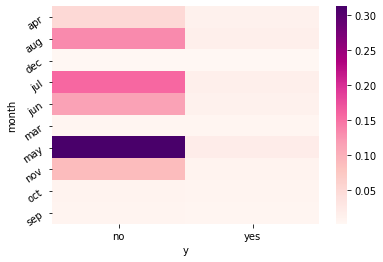

In [0]:
frequencies = pd.crosstab(bank_df["month"], bank_df["y"]).apply(lambda r: r/len(bank_df))
print(frequencies)

heat_map = sns.heatmap(frequencies, cmap="RdPu");
#ax.set_yticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=35);

Conclusion:
Month of May, Jun, July, August & November have negative impact on the output

41188

## Start training

### Separating Independent and class variables:

In [0]:
bank_prepared_X = bank_prepared.drop("y", axis=1)
bank_prepared_y = bank_prepared["y"].copy()

In [0]:
bank_prepared_X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533143,0.010352,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1.629107,-0.421577,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,-0.290177,-0.124626,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,-0.002284,-0.413864,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,1.533143,0.187751,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [0]:
bank_prepared_y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

### test set split

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bank_prepared, test_size=0.2, random_state=42)

In [0]:
print(len(train_set))
print(len(test_set))

32940
8236


In [0]:
X_train = train_set.drop("y", axis=1)
y_train = train_set["y"].copy()

In [0]:
#train_X = train_X.drop("pdays", axis=1)

In [0]:
X_train = X_train.drop("duration", axis=1)

In [0]:
X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12348,-1.057890,0.155984,-0.164037,-0.349551,0.839079,0.591329,-0.474769,0.771272,0.845186,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8565,0.957358,1.238905,-0.164037,-0.349551,0.839079,1.536336,-0.280292,0.716499,0.845186,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
21424,-1.057890,0.516958,-0.164037,-0.349551,0.839079,-0.227562,0.951394,0.773578,0.845186,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3316,-0.482105,-0.565963,-0.164037,-0.349551,0.648101,0.722628,0.886568,0.714192,0.331695,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
33246,-0.002284,-0.565963,-0.164037,-0.349551,-1.198017,-1.179479,-1.231067,-1.343561,-0.940269,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [0]:
X_train.info()

In [0]:
X_test = test_set.drop("y", axis=1)
#test_X = test_X.drop("pdays", axis=1)
X_test = X_test.drop("duration", axis=1)
y_test = test_set["y"].copy()

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

### Logistic regression

* model building

In [0]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(penalty='l2', C=0.05, class_weight="balanced",
                                  max_iter=1000)
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# model with "duration"
scores = cross_val_score(logistic_reg, X_train, y_train, 
                         scoring="accuracy", cv=10);
scores
print('mean score:', np.mean(scores))

mean score: 0.8231936854887675


In [0]:
# model without "duration"
scores = cross_val_score(logistic_reg, X_train, y_train, 
                         scoring="accuracy", cv=10);
print(scores)
print('mean score:', np.mean(scores))

[0.82999393 0.82695811 0.82726169 0.82665452 0.82301154 0.82119004
 0.81633273 0.82301154 0.82392228 0.81360049]
mean score: 0.8231936854887675


* Confusion Matrix

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(logistic_reg, X_train, y_train, cv=10)

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[24789,  4483],
       [ 1341,  2327]])

In [0]:
confusion_matrix(y_train, y_train)

array([[29272,     0],
       [    0,  3668]])

* ROC curve

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_true = y_train
y_probas = cross_val_predict(logistic_reg, X_train, y_train, cv=10, method='predict_proba')
y_scores_logis = y_probas[:,1]
roc_auc_score(y_true, y_scores_logis)

0.7922777018945829

In [0]:
y_probas = logistic_reg.predict_proba(X_test)
y_scores_logis = y_probas[:,1]
roc_auc_score(y_test, y_scores_logis)

0.7911006242278662

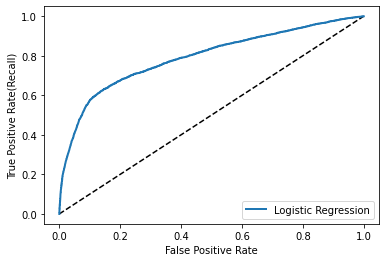

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot([0,1],[0,1], 'k--')
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate(Recall)")

fpr_logis, tpr_logis, threshold_logis = roc_curve(y_train, y_scores_logis)
plot_roc_curve(fpr_logis, tpr_logis, "Logistic Regression")
plt.legend(loc="lower right");

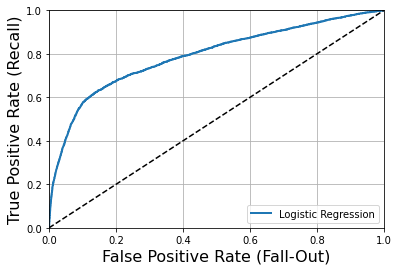

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(6, 4))                         
plot_roc_curve(fpr_logis, tpr_logis,"Logistic Regression")
plt.legend(loc="lower right");
plt.show()

### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
y_probas_tree = cross_val_predict(tree_clf, X_train, y_train, cv=10,
                                  method="predict_proba")

In [0]:
y_scores_tree = y_probas_tree[:, 1] # score = proba of positive class
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train,y_scores_tree)

roc_auc_score(y_train, y_scores_tree)

0.624429047466056

In [0]:
y_probas = tree_clf.predict_proba(X_test)
y_scores_tree = y_probas[:,1]
roc_auc_score(y_test, y_scores_tree)

NotFittedError: ignored

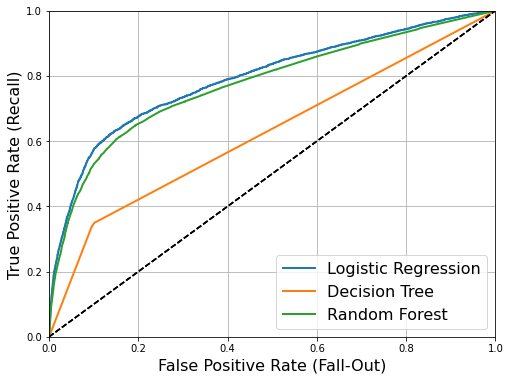

In [0]:
plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_logis, tpr_logis,"Logistic Regression")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

### Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=10,
                                    method="predict_proba")

In [0]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

roc_auc_score(y_train, y_scores_forest)

0.7747981236716923

In [0]:
y_probas = forest_clf.predict_proba(X_test)
y_scores_forest = y_probas[:,1]
roc_auc_score(y_test, y_scores_forest)

NotFittedError: ignored

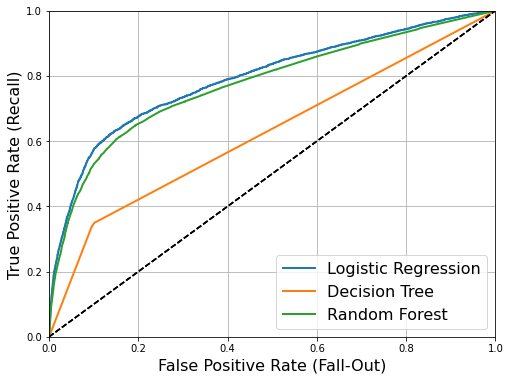

In [0]:
plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_logis, tpr_logis,"Logistic Regression")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

### SVM

In [0]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC(C=1, loss="hinge",random_state=42)
svc_clf.fit(X_train, y_train)
# y_probas_svc = cross_val_predict(svc_clf, X_train, y_train, cv=10,
#                                  method="predict_proba")

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [0]:
scores = cross_val_score(svc_clf, X_train, y_train, 
                         scoring="accuracy", cv=10);
print(scores)
print('mean score:', np.mean(scores))

[0.89678203 0.90437158 0.89496053 0.89981785 0.90346084 0.8955677
 0.89981785 0.89769277 0.89738919 0.89465695]
mean score: 0.8984517304189434


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

linearSVM = SGDClassifier(penalty='l2', alpha=0.0001, class_weight='balanced',
                          random_state=42)
linearSVM.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
y_probas_svm = sig_clf.predict_proba(X_train)
y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train,y_scores_svm)

print ("The train AUC is:", roc_auc_score(y_train, y_scores_svm))
#predict_y = sig_clf.predict_proba(X_cv)
#print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
#predict_y = sig_clf.predict_proba(X_test)
#print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

The train AUC is: 0.7919691371762849


In [0]:
y_probas = sig_clf.predict_proba(X_test)
y_scores_svm = y_probas[:,1]
roc_auc_score(y_test, y_scores_svm)

0.7802550637446726

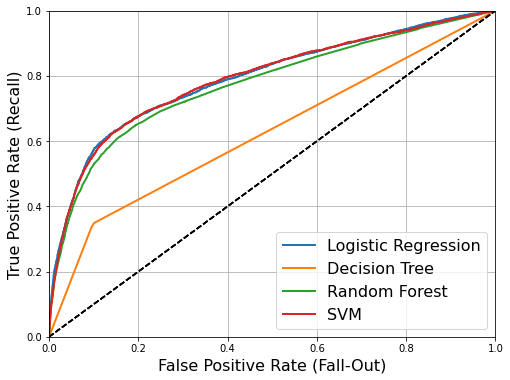

In [0]:
plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_logis, tpr_logis,"Logistic Regression")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVM")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

### XGBoost

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

x_cfl=XGBClassifier(random_state=42)#tree_method='gpu_hist', max_bin=16

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
    'n_estimators':[100,200,500,1000,2000],
    'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=10, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
xgboost.DMatrix
print (random_cfl.best_params_)

In [0]:
from xgboost import XGBClassifier

x_clf=XGBClassifier(random_state=42)
x_clf.fit(X_train, y_train)

y_probas_x = x_clf.predict_proba(X_train)
y_scores_x = y_probas_x[:, 1] # score = proba of positive class

fpr_x, tpr_x, thresholds_x = roc_curve(y_train,y_scores_x)

print ("The train AUC is:", roc_auc_score(y_train, y_scores_x))

The train AUC is: 0.8125782250515081


In [0]:
y_probas = x_clf.predict_proba(X_test)
y_scores_x = y_probas[:,1]
roc_auc_score(y_test, y_scores_x)

0.7989979891740019

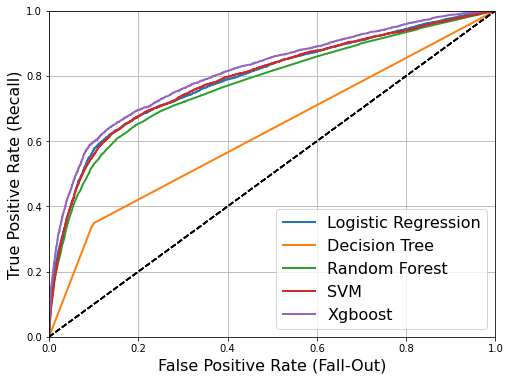

In [0]:
plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_logis, tpr_logis,"Logistic Regression")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVM")
plot_roc_curve(fpr_x, tpr_x, "Xgboost")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

### NN

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras_model = Sequential([
                          #keras.layers.Flatten(input_shape=(4,)),
                          Dense(62, activation='relu'),
                          Dense(30, activation='relu'),
                          Dense(1, activation='sigmoid'),
])

In [0]:
keras_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

keras_model.fit(X_train, y_train, epochs=15, batch_size=1)
test_loss, test_acc = keras_model.evaluate(X_test, y_test)

Epoch 1/15
32940/32940 [==============================] - 43s 1ms/step - loss: 0.2797 - accuracy: 0.8987
Epoch 2/15
32940/32940 [==============================] - 43s 1ms/step - loss: 0.2759 - accuracy: 0.9015
Epoch 3/15
32940/32940 [==============================] - 43s 1ms/step - loss: 0.2744 - accuracy: 0.9018
Epoch 4/15
32940/32940 [==============================] - 42s 1ms/step - loss: 0.2723 - accuracy: 0.9012
Epoch 5/15
32940/32940 [==============================] - 42s 1ms/step - loss: 0.2716 - accuracy: 0.9033
Epoch 6/15
32940/32940 [==============================] - 43s 1ms/step - loss: 0.2705 - accuracy: 0.9034
Epoch 7/15
32940/32940 [==============================] - 43s 1ms/step - loss: 0.2699 - accuracy: 0.9032
Epoch 8/15
32940/32940 [==============================] - 43s 1ms/step - loss: 0.2693 - accuracy: 0.9041
Epoch 9/15
32940/32940 [==============================] - 43s 1ms/step - loss: 0.2685 - accuracy: 0.9041
Epoch 10/15
32940/32940 [==============================

In [0]:
keras_model.fit(X_train, y_train, epochs=15, batch_size=1)
test_loss, test_acc = keras_model.evaluate(X_test, y_test)

Epoch 1/15
32940/32940 [==============================] - 41s 1ms/step - loss: 0.2650 - accuracy: 0.9066
Epoch 2/15
32940/32940 [==============================] - 42s 1ms/step - loss: 0.2650 - accuracy: 0.9070
Epoch 3/15
32940/32940 [==============================] - 42s 1ms/step - loss: 0.2642 - accuracy: 0.9069
Epoch 4/15
32940/32940 [==============================] - 41s 1ms/step - loss: 0.2631 - accuracy: 0.9072
Epoch 5/15
32940/32940 [==============================] - 41s 1ms/step - loss: 0.2623 - accuracy: 0.9077
Epoch 6/15
32940/32940 [==============================] - 41s 1ms/step - loss: 0.2621 - accuracy: 0.9077
Epoch 7/15
32940/32940 [==============================] - 40s 1ms/step - loss: 0.2619 - accuracy: 0.9080
Epoch 8/15
32940/32940 [==============================] - 40s 1ms/step - loss: 0.2606 - accuracy: 0.9087
Epoch 9/15
32940/32940 [==============================] - 40s 1ms/step - loss: 0.2594 - accuracy: 0.9086
Epoch 10/15
32940/32940 [==============================

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_train).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_pred_keras)

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.8375897050132284

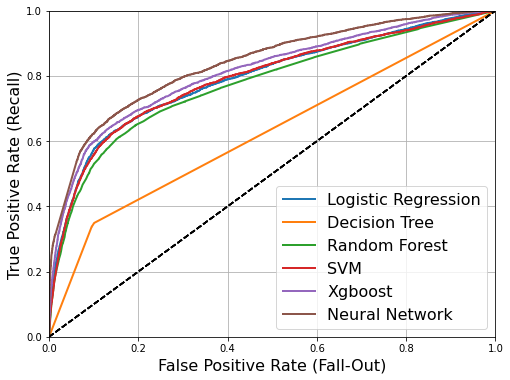

In [0]:
plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_logis, tpr_logis,"Logistic Regression")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVM")
plot_roc_curve(fpr_x, tpr_x, "Xgboost")
plot_roc_curve(fpr_keras, tpr_keras, "Neural Network")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [0]:
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.790546566179707

In [0]:
plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_logis, tpr_logis,"Logistic Regression")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_svm, tpr_svm, "SVM")
plot_roc_curve(fpr_x, tpr_x, "Xgboost")
plot_roc_curve(fpr_keras, tpr_keras, "Neural Network")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [0]:
X_train.shape

(32940, 62)